Praca domowa 4 (8 pkt.)
Termin: 29.04.2021 15:00

Dla wybranego modelu przygotuj knitr/jupyter notebook w formacie html lub pdf rozwiązując poniższe punkty. Pracę domową należy zgłosić przez Pull Request na GitHub w folderze PraceDomowe/PracaDomowa4/Nazwisko_Imię.

    Wylicz permutacyjną ważność zmiennych dla wybranego modelu.
    Porównaj ważność zmiennych z punktu (1) z wynikami tej metody zastosowanej dla modeli innych klas na tym samym ziorze danych (np. las losowy oraz xgboost).
    Skomentuj poszczególne wyniki uzyskane w powyższych punktach.
    W pracy domowej oceniane przede wszystkim będą wnioski z otrzymanych analiz. Kod potrzebny do reprudokowalności wyników również proszę załączyć.

Prace domowe należy zgłaszać przez Pull Request o tytule Nazwisko Imię PD4. Wszystkie pliki związane z pracą domową proszę o umieszczenie w folderze Nazwisko_Imię.

In [1]:
suppressWarnings(suppressMessages(library(OpenML)))
suppressWarnings(suppressMessages(library(mlr)))
suppressWarnings(suppressMessages(library(pROC)))
suppressWarnings(suppressMessages(library(plyr)))
suppressWarnings(suppressMessages(library(DALEX)))
suppressWarnings(suppressMessages(library(DALEXtra)))

set.seed(9)

In [2]:
def <- read.csv("diabetes.csv")

def$class[def$class == "tested_positive"] <- 1
def$class[def$class == "tested_negative"] <- 0
head(def)

,preg,plas,pres,skin,insu,mass,pedi,age,class
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [3]:
m <- sample(1:nrow(def), 0.7*nrow(def))
train <- def[m,]
test <- def[-m,]

In [4]:
classif_task <- makeClassifTask(data = train, target = "class")

classif_lrn_ranger <- makeLearner("classif.ranger", predict.type = "prob")

In [5]:
model_ranger <- train(classif_lrn_ranger, classif_task)

In [6]:
explainer <- explain(model = model_ranger,
                     data = def[,-9],
                     y = as.numeric(as.character(def$class)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  768  rows  8  cols 
  -> target variable   :  768  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  numerical, min =  0 , mean =  0.339206 , max =  0.9468325  
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7736183 , mean =  0.009752284 , max =  0.970854  
  A new explainer has been created!  


In [7]:
model_performance(explainer)

Measures for:  classification
recall     : 0.8171642 
precision  : 0.9240506 
f1         : 0.8673267 
accuracy   : 0.9127604 
auc        : 0.9559627

Residuals:
         0%         10%         20%         30%         40%         50% 
-0.77361825 -0.33783316 -0.22464175 -0.14737984 -0.08940767 -0.04449414 
        60%         70%         80%         90%        100% 
-0.01034683  0.15091294  0.29678762  0.41907897  0.97085397 

In [8]:
fi <- model_parts(explainer, B = 10)

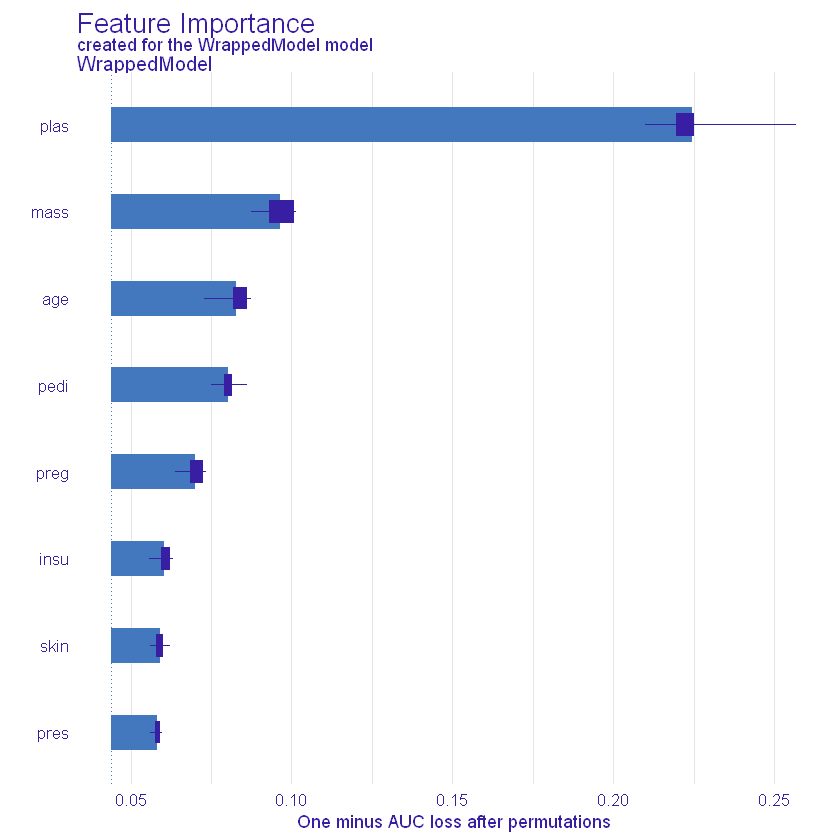

In [9]:
plot(fi)

# Według model_parts najważniejszą zmienną dla rangera jest plas ponieważ po przelosowaniu jej wartości AUC zmalało najbardziej

In [10]:
classif_lrn_svm <- makeLearner("classif.svm", predict.type = "prob")

In [11]:
model_svm  <- train(classif_lrn_svm , classif_task)

In [12]:
explainer_svm  <- explain(model = model_svm,
                     data = def[,-9],
                     y = as.numeric(as.character(def$class)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  768  rows  8  cols 
  -> target variable   :  768  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  numerical, min =  0.03747172 , mean =  0.6704681 , max =  0.9302601  
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.9302601 , mean =  -0.3215098 , max =  0.9625283  
  A new explainer has been created!  


In [13]:
model_performance(explainer_svm)

Measures for:  classification
recall     : 0.4626866 
precision  : 0.2077052 
f1         : 0.2867052 
accuracy   : 0.1966146 
auc        : 0.1208358

Residuals:
        0%        10%        20%        30%        40%        50%        60% 
-0.9302601 -0.8975298 -0.8761892 -0.8407255 -0.8130196 -0.7423502 -0.5542303 
       70%        80%        90%       100% 
 0.2399193  0.4662925  0.7683864  0.9625283 

In [14]:
fi <- model_parts(explainer_svm, B = 10)

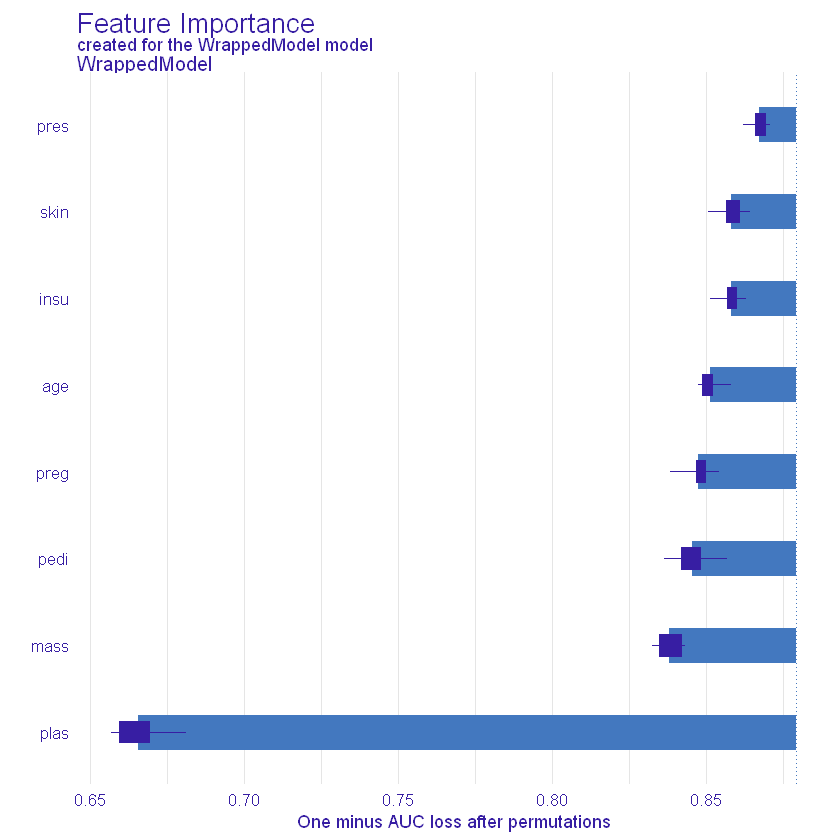

In [15]:
plot(fi)

# Dosyć nietypowy wynik. Przelosowanie wartości kolumn w każdym przypadku zwiększało AUC co sugeruje nieudolność modelu. Możnaby odwrócić wynik klasyfikacji modelu.

In [16]:
def$class[def$class == "1"] <- 3
def$class[def$class == "0"] <- 1
def$class[def$class == "3"] <- 0

In [17]:
head(def)

,preg,plas,pres,skin,insu,mass,pedi,age,class
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,6,148,72,35,0,33.6,0.627,50,0
2,1,85,66,29,0,26.6,0.351,31,1
3,8,183,64,0,0,23.3,0.672,32,0
4,1,89,66,23,94,28.1,0.167,21,1
5,0,137,40,35,168,43.1,2.288,33,0
6,5,116,74,0,0,25.6,0.201,30,1


In [18]:
model_svm  <- train(classif_lrn_svm , classif_task)

In [19]:
explainer_svm  <- explain(model = model_svm,
                     data = def[,-9],
                     y = as.numeric(as.character(def$class)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  768  rows  8  cols 
  -> target variable   :  768  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  numerical, min =  0.04531547 , mean =  0.6692001 , max =  0.9228405  
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8911439 , mean =  -0.01815846 , max =  0.8506347  
  A new explainer has been created!  


In [20]:
model_performance(explainer_svm)

Measures for:  classification
recall     : 0.946 
precision  : 0.7909699 
f1         : 0.8615665 
accuracy   : 0.8020833 
auc        : 0.8791642

Residuals:
         0%         10%         20%         30%         40%         50% 
-0.89114392 -0.64818897 -0.40153788 -0.18747472  0.09948461  0.12032059 
        60%         70%         80%         90%        100% 
 0.15284153  0.18913307  0.21883987  0.33851248  0.85063468 

In [21]:
fi <- model_parts(explainer_svm, B = 10)

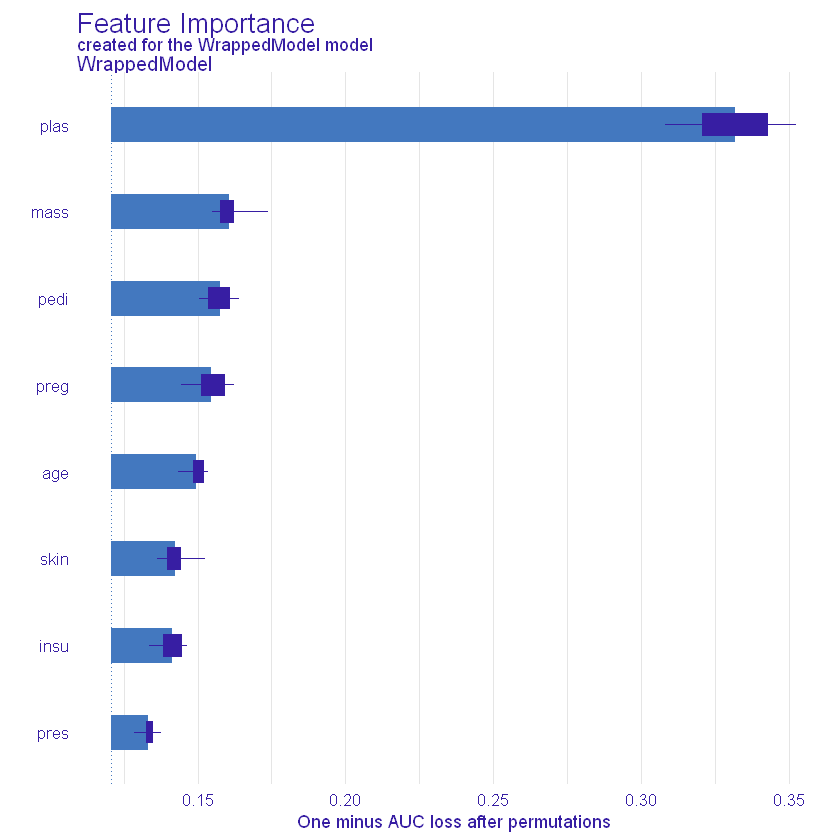

In [22]:
plot(fi)

# Wynik jest symetryczny do poprzedniego i podobny do tego przy rangerze aczkolwiek SVM traci więcej AUC przy tasowaniu